In [1]:
# # 步骤
# 1、读取numpy文件
# 2、onehot独热编码
# 3、分为tain和test数据
# 4、搭建CNN模型
# 5、训练模型
# 6、保存模型


## 1、读取NPA文件

In [2]:
# 导入相关包
import numpy as np 


In [3]:
arr = np.load('./data/imageData.npz')

In [4]:
arr['arr_1']

array(['1.yes', '1.yes', '1.yes', ..., '3.nose', '3.nose', '3.nose'],
      dtype='<U6')

In [5]:
img_list = arr['arr_0']

In [6]:
label_list = arr['arr_1']

In [7]:
img_list.shape,label_list.shape

((5328, 100, 100, 3), (5328,))

## 2、onehot独热编码

In [8]:
np.unique(label_list)

array(['1.yes', '2.no', '3.nose'], dtype='<U6')

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
# 实例化
onehot =  OneHotEncoder()

In [11]:
# 编码
y_onehot = onehot.fit_transform(label_list.reshape(-1,1))

In [12]:
y_onehot_arr = y_onehot.toarray()

In [13]:
y_onehot_arr

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

## 3、分为tain和test数据

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_tain,y_test = train_test_split(img_list,y_onehot_arr,test_size=0.2,random_state=42)

In [16]:
x_train.shape,x_test.shape,y_tain.shape,y_test.shape

((4262, 100, 100, 3), (1066, 100, 100, 3), (4262, 3), (1066, 3))

## 4、搭建CNN模型

![](./cnn.png)

In [17]:
import tensorflow as tf 

In [18]:
from tensorflow .keras import layers

In [19]:
from tensorflow.keras import Sequential

In [20]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(166,activation='relu'),
    layers.Dense(22,activation='relu'),
    layers.Dense(3,activation='sigmoid')
])

In [21]:
# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [22]:
# 预览模型
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

## 5、训练模型

In [23]:
history = model.fit(x=x_train,y=y_tain,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10
143/143 [==============================] - 6s 32ms/step - loss: 0.3254 - accuracy: 0.8757 - val_loss: 0.1241 - val_accuracy: 0.9587
Epoch 2/10
143/143 [==============================] - 2s 15ms/step - loss: 0.1023 - accuracy: 0.9686 - val_loss: 0.1026 - val_accuracy: 0.9719
Epoch 3/10
143/143 [==============================] - 2s 16ms/step - loss: 0.1010 - accuracy: 0.9667 - val_loss: 0.0752 - val_accuracy: 0.9747
Epoch 4/10
143/143 [==============================] - 2s 16ms/step - loss: 0.0622 - accuracy: 0.9814 - val_loss: 0.1189 - val_accuracy: 0.9634
Epoch 5/10
143/143 [==============================] - 2s 16ms/step - loss: 0.0399 - accuracy: 0.9891 - val_loss: 0.0672 - val_accuracy: 0.9812
Epoch 6/10
143/143 [==============================] - 2s 16ms/step - loss: 0.0142 - accuracy: 0.9956 - val_loss: 0.0894 - val_accuracy: 0.9784
Epoch 7/10
143/143 [==============================] - 2s 16ms/step - loss: 0.0232 - accuracy: 0.9933 - val_loss: 0.0779 - val_accuracy: 0.9794

In [24]:
# 查看训练效果
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
history_pd = pd.DataFrame(history.history)

In [27]:
history_pd

,loss,accuracy,val_loss,val_accuracy
0,0.193270,0.934069,0.124076,0.958724
1,0.091632,0.971844,0.102583,0.971857
2,0.087157,0.972079,0.075211,0.974672
3,0.049634,0.984280,0.118870,0.963415
4,0.032795,0.991319,0.067218,0.981238
5,0.016716,0.995307,0.089436,0.978424
6,0.022719,0.992726,0.077937,0.979362
7,0.018047,0.994134,0.084211,0.979362
8,0.012812,0.995542,0.095034,0.980300
9,0.003957,0.999061,0.088862,0.986867


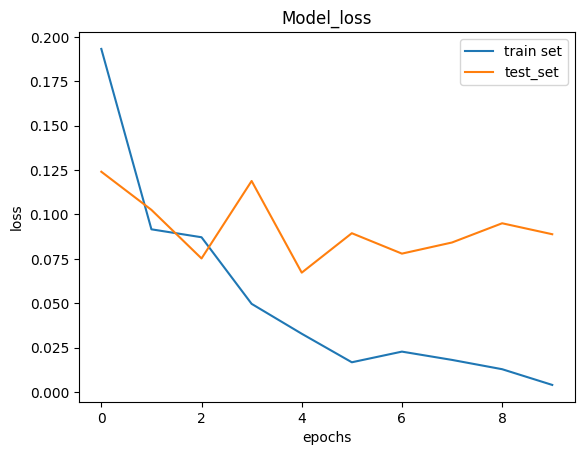

In [29]:
# 查看损失
plt.plot(history_pd['loss'])
plt.plot(history_pd['val_loss'])
plt.title('Model_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train set','test_set'],loc='upper right')
plt.show()

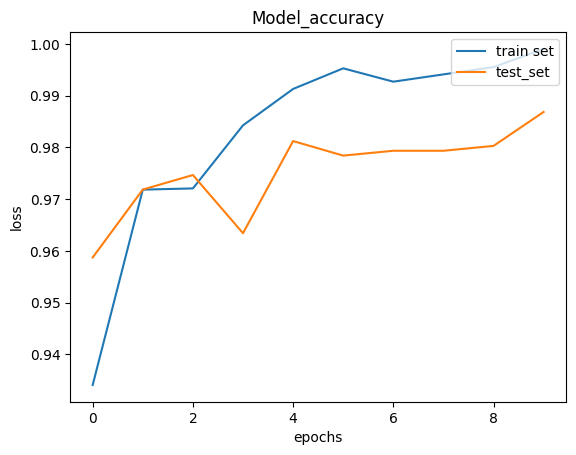

In [30]:
# 查看准确率
plt.plot(history_pd['accuracy'])
plt.plot(history_pd['val_accuracy'])
plt.title('Model_accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train set','test_set'],loc='upper right')
plt.show()

## 6、保存模型

In [32]:
model.save('./data/face_mask_model.h5')